## 1. Import Modul



In [ ]:
!git clone https://github.com/anuarali14/Portofolio_Project.git

Cloning into 'Portofolio_Project'...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# 2. Membuka Data dan Menganalisis Isi Data

In [ ]:
HDFC_df = pd.read_csv("/content/sample_data/HDFCBANK.NS.csv")
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


In [ ]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0


In [ ]:
HDFC_df.shape

(491, 7)

In [ ]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
HDFC_df['Date'] = pd.to_datetime(HDFC_df['Date'])
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
3,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
4,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


In [ ]:
type(HDFC_df.loc[0, "Date"])

pandas._libs.tslibs.timestamps.Timestamp

# 3. Cek Data yang Kosong

In [ ]:
HDFC_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
HDFC_df.dropna(inplace = True, axis = 0)

# 4. Melihat Sampel Daftar Stok Market

In [ ]:
HDFC_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1255,1263,1243,1252,1252,5973670
std,24,22,25,24,24,1824496
min,1197,1197,1177,1186,1186,1836849
25%,1242,1248,1227,1239,1239,4651834
50%,1256,1262,1243,1253,1253,5792594
75%,1276,1281,1264,1272,1272,6685996
max,1305,1305,1288,1302,1302,11256610


# 5. Observasi Saham

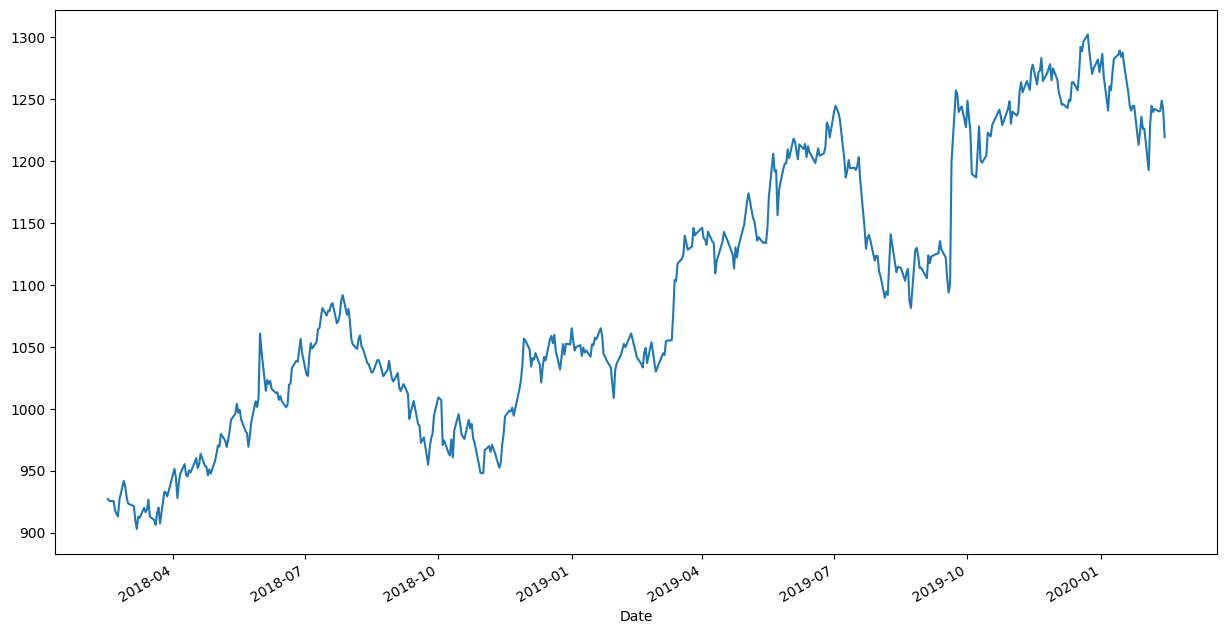

In [ ]:
HDFC_df.index = HDFC_df["Date"]
HDFC_df["Adj Close"].plot(figsize = (15,8))
plt.show()

Terdapat penurunan harga saham pada tahun 2018 yang disebabkan oleh perang tariff antara Amerika dengan Cina sampai pada akhir tahun. Kemudian ada reaksi rejection harga saham di tahun 2019 karena isu Covid-19.

# 6. Day-to-Day Percentage

In [ ]:
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0,NaN
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0,-0.311571


In [ ]:
HDFC_df.dropna(axis = 0, inplace = True)

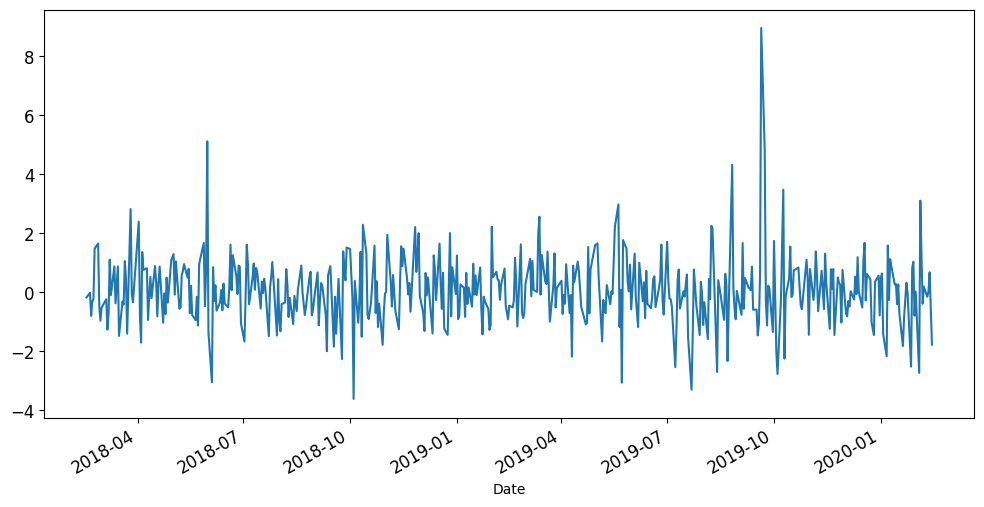

In [ ]:
HDFC_df["Day_Perc_Change"].plot(figsize = (12,6), fontsize = 12)
plt.show()

Persentase Return berkisar antara -2% sampai 2%

# 7. Distribusi Daily dalam bentuk Histogram

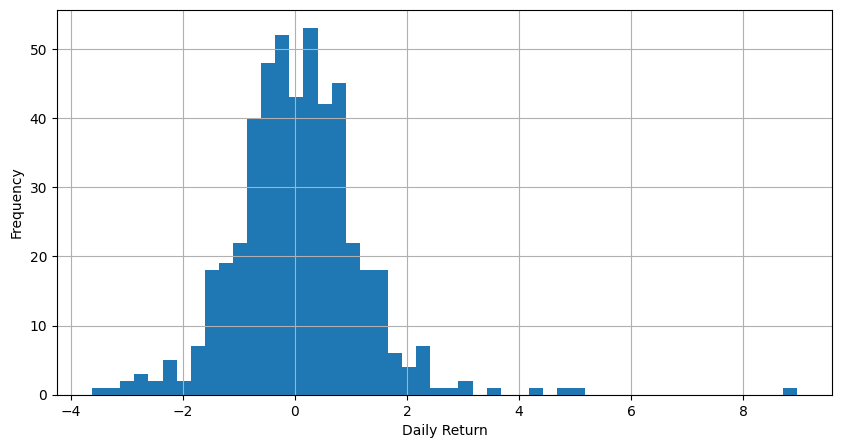

count    489.000000
mean       0.062724
std        1.162384
min       -3.614446
25%       -0.596775
50%        0.020391
75%        0.693165
max        8.950547
Name: Day_Perc_Change, dtype: float64

In [ ]:
HDFC_df["Day_Perc_Change"].hist(bins = 50, figsize = (10,5))
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

HDFC_df.Day_Perc_Change.describe()

# 8. Trend Analisis

In [ ]:
def trend (x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No Change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among Top Gainers"
  elif x > -7 and x <= -3:
    return "Among Top Losers"
  elif x > 7:
    return "Bull Run"
  elif x <= -7:
    return "Bear Drop"

HDFC_df["Trend"] = HDFC_df["Day_Perc_Change"].apply(lambda x:trend(x))
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,941.95,947.42,937.83,939.3,925.51,1791760.0,-0.175809,Slight or No Change
2018-02-19,2018-02-19,941.30,943.80,929.53,939.1,925.32,1827276.0,-0.020529,Slight or No Change
2018-02-20,2018-02-20,942.38,942.92,929.40,931.6,917.93,2042034.0,-0.798643,Slight Negative
2018-02-21,2018-02-21,933.97,934.28,926.10,928.7,915.07,1376536.0,-0.311571,Slight or No Change
2018-02-22,2018-02-22,925.00,930.00,920.78,926.6,913.00,6626798.0,-0.226212,Slight or No Change
